# Homework 5

We consider steady-state flow in a fully saturated porous medium.  We will assume constant porosity and viscosity for simplicity, leading to [Darcy's law](https://en.wikipedia.org/wiki/Darcy%27s_law) producing a flux
$$ q = -\kappa \nabla p $$
in terms of pressure $p$ and permeability $\kappa$.
Conservation of mass yields a Laplacian
$$ \nabla\cdot q = -\nabla\cdot \big( \kappa \nabla p \big) = 0 . $$
The velocity of the fluid is
$$ u = \frac q \phi $$
where $\phi \in (0,1]$ is porosity.

Our flow will take place on the 2D unit disc with two holes removed
$$ \left\{ x \in \mathbb R^2 : |x|<1, \big|x-(1/2,0)| > 1/4\big|, \big|x-(-1/2,0)| > 1/4\big|  \right\} . $$
The outer boundary is Neumann, corresponding to an impermeable boundary.
The left "hole" is our inejection with a relative pressure of 1 and the right is extraction with a relative pressure of 0.
We can solve for pressure as follows.

```python
mesh = Mesh(shape='eyes', reshape_boundary=True)
fe = fe2tri(2)
prob = laplacian2()
x, pressure = fe2_solve(fe, mesh, prob.form, dict(left=lambda x:0*x[:,0]+1, right=lambda x:0*x[:,0]))
pyplot.tricontourf(x[:,0], x[:,1], pressure, triangles=mesh.tri2())
pyplot.title('Pressure')
pyplot.colorbar();
```

The velocity field can be computed by taking the gradient of pressure and dividing by permeability.
Now suppose that the fluid being injected at the left hole is hot while the outflow is a colder heat sink.
Temperature will satisfy the advection-diffusion equation (with appropriate choice of units)
$$ \nabla\cdot \big( - \nabla T + u T \big) = 0 $$
with boundary conditions $T=1$ at the left (inflow) hole, $T=0$ at the right (outflow) hole, and Neumann conditions at the (insulated) outer boundary.
The homework is to solve for temperature using the velocity field defined by the pressure solution above.

* You will need to modify `fe2_solve` so that you can evaluate velocity at the quadrature points.
* You will need to write a `form` function that implements the weak form of the advection-diffusion equation for temperature.

With respect to your numerically computed solutions, think about the following questions.

1. What is the order of accuracy of $p$, $u$, and $T$ for linear `fe2tri(1)` and quadratic `fe2tri(2)` elements? Rather than interpolating to compare in a norm, you can compare by computing moments of the error, such as
$$ \int_\Omega x (u_{2h} - u_h)(x,y) = \int_\Omega x u_{2h}(x,y) - \int_\Omega x u_h(x,y), $$
where the two integrals on the right can be carried out on the natural quadrature of each mesh independently.

2. When porosity $\phi$ decreases (at fixed permeability), the velocity increases.  Can you obtain an accurate solution for $T$ for any value of $\phi$ or is there a relationship between $\phi$ and the grid size $h$?


## Notebook Setup

In [11]:
%precision 3
#%matplotlib notebook
%matplotlib inline

import numpy
from matplotlib import pyplot
pyplot.style.use('ggplot')

import scipy.sparse as sp
import scipy.sparse.linalg
from scipy.optimize import fsolve

%run hw_support.py

## Solve for Temperature

Temperature satisfies 
$$ \nabla\cdot \big( - \nabla T + u T \big) = 0 $$
with boundary conditions $T=1$ at the left (inflow) hole, $T=0$ at the right (outflow) hole, and Neumann conditions at the (insulated) outer boundary.

    Subdomain boundary inhomogeneous (edge length ratio 4.000). Skipping.
Newton 1 anorm 1.12e-14 rnorm 9.89e-16


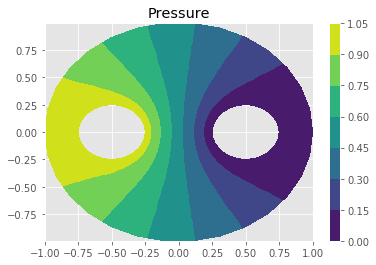

In [12]:
mesh = Mesh(shape='eyes', reshape_boundary=True)
fe = fe2tri(2)
prob = laplacian2()
x, pressure = fe2_solve(fe, mesh, prob.form, dict(left=lambda x:0*x[:,0]+1, right=lambda x:0*x[:,0]))
pyplot.tricontourf(x[:,0], x[:,1], pressure, triangles=mesh.tri2())
pyplot.title('Pressure')
pyplot.colorbar();